# Test case of Echo State Network

Load the needed libraries:

In [1]:
import pandas as pd
import numpy as np
from ESNs.standard import EsnNetwork
from test.benchmark import Benchmark
import matplotlib.pyplot as plt
%matplotlib inline

Load tensorflow and create an interactive session:

In [2]:
import tensorflow as tf
sess = tf.InteractiveSession()

Create a *Benchmark* object of the **mackey-glass** signal with a delay=2:

In [3]:
p = Benchmark(fun='mackey', train_length=5000, delay=2)
reservoir_size = 100
prec = tf.float64

Create the placeholders to for the data and target and pass it as arguments to new Esn Network object:

In [4]:
data = tf.placeholder(prec, [None, p.train_input.shape[1]])
target = tf.placeholder(prec, [None, p.train_target.shape[1]])
esn = EsnNetwork(data, target, prec=prec)
sess.run(tf.global_variables_initializer())

Train the esn network using the **mackey-glass** signal:

In [5]:
e, _ = sess.run([esn.error, esn.optimize], {data:p.train_input, target:p.train_target})
print('Initial error:', e)
e = sess.run(esn.error, {data:p.train_input, target:p.train_target})
print('Training error:', e)

Initial error: [ 1.62144557]


Training error: [ 0.03457943]


Test the trained esn network with an unseen **mackey-glass** signal:

In [6]:
e = sess.run(esn.error, {data:p.test_input, target:p.test_target})
print('Test error:', e)

Test error: [ 0.03497432]


Plot the target and prediction signals in the test case:

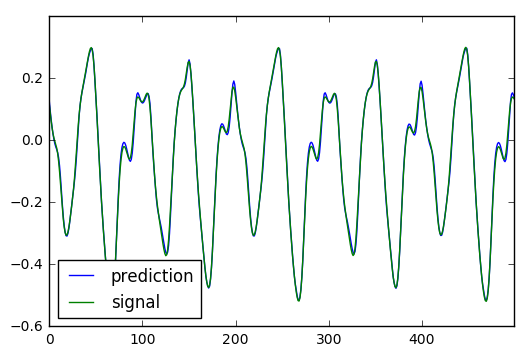

In [7]:
signal = sess.run(esn.target, {target:p.test_target})
prediction = sess.run(esn.prediction, {data:p.test_input})
results = {'signal':np.reshape(signal, -1), 'prediction':np.reshape(prediction, -1)}
df = pd.DataFrame.from_dict(results)
df.plot();

In [8]:
sess.close()